# Guessing the Price of a Rental

In [1281]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [1282]:
df = pd.read_csv("nyc_rental_data.csv")

In [1283]:
len(df)

48895

In [1284]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [1285]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Step 1: Business Understanding

We need to quickly get the rental price of a property to save ourselves and our clients time

## Step 2: Data Understanding

This is an example of supervised learning because we have some information about the price of some rentals, and we can use it to predict the price of other rentals.

Two types of supervised learning are regression and classification.

When the target variable is numerical, we have a regression problem, and when the target variable is categorical, we have a classification problem.

check how many rentals have a price, because price is our target variable since that's what we want to predict

In [1286]:
df.price

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [1287]:
df.price.isnull().sum() == 0

np.True_

There are almost 50k data points, and all of them have a price. It is unlikely that we'll need more data.

In [1288]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

We can use some of the features above to improve our model as well as our predictions.

### Let's clean up the columns and features:

In [1289]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
string_columns = list(df.dtypes[df.dtypes == "object"].index)
for column in string_columns:
    df[column] = df[column].str.lower().str.replace(" ", "_")

In [1290]:
print(df.columns)  # cleans up all the columns
print("\n")
print(string_columns)  # cleans up the values in the columns that have string values

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


Now the data looks more uniform as seen below:

In [1291]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0


The price column contains the important information, it's our target variable, the y, which is the value that we want to learn to predict.

One of the first steps of exploratory data analysis should always be to look at what the values of y look like. We typically do this by checking the distribution of y: a visual description of what the possible values of y can be and how often they occur. This type of visualization is called a histogram.

<Axes: xlabel='price', ylabel='Count'>

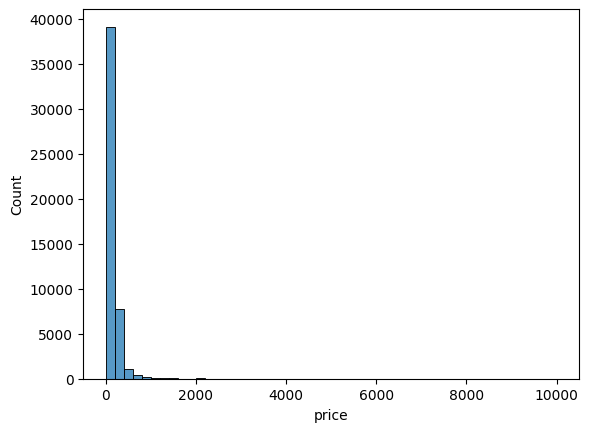

In [1292]:
sns.histplot(df.price, bins=50)

After plotting the graph, we notice that the distribution of prices has a very long tail. There are many rentals with low prices on the left side, but the number quickly drops, and there's a long tail of very few rentals with high prices.

We can have a closer look by zooming in a bit and looking at values below $1000.

<Axes: xlabel='price', ylabel='Count'>

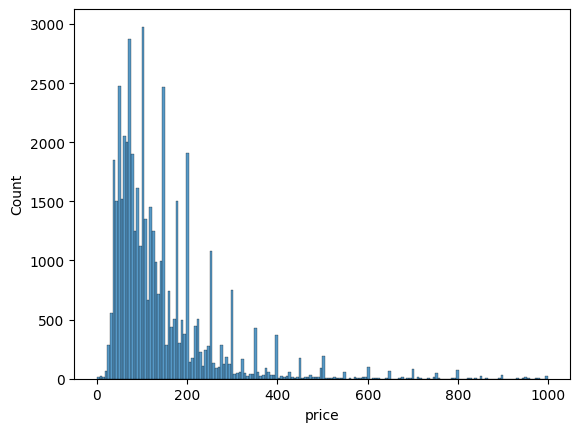

In [1293]:
sns.histplot(df.price[df.price < 1000])

The long tail makes it difficult for us to see the distribution, but it has an even stronger effect on a model: such distributions can greatly confuse the model, so it won't learn well enough. One way to solve this problem is log transformation. If we apply the log function to the prices, it removes the undesired effect.

By adding 1 to the values, we make sure that the transformed values do not go below zero, since the log of 0 is -inf, and the log of 1 is 0.

In [1294]:
log_price = np.log1p(df.price)

<Axes: xlabel='price', ylabel='Count'>

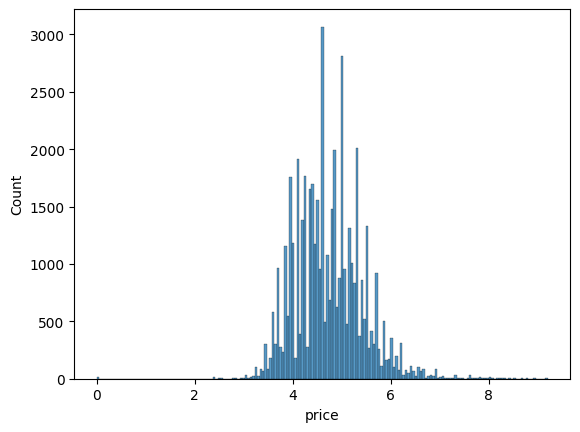

In [1295]:
sns.histplot(log_price)

This transformation removes the long tail, and now the distribution resembles a bell-shaped curve. The model can deal with this more easily.

Generally, it's good when the target distribution looks like the normal distribution. Under this condition, models such as linear regression perform well.

Let's check how many missing values there are.

In [1296]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

price doesn't have any missing values, this is good. A few columns like last_review and reviews_per_month have many missing values. We need to deal with missing values later when we train the model, so we should keep this problem in mind.

## Step 3: Data Preparation

We need to transform the data into a tabular form that we can use as input for a machine learning model.

This is where we transform the dataset into a set of features that we feed into the model later.

Let's split the dataset into Train, Validation, and Test.

Since the validation dataset is not used for training the model, the optimization method did not see this daya. When we apply the model to this data, it emulates the case of applying the model to new data that we've never seen.

A normal distribution would be to split the DataFrame such that 20% goes to validation, 20% goes to test, and the remaining 60% to train.

To make sure that every time we use this dataset the results are the same, we fix the random seed.

In [1297]:
np.random.seed(2)

Let's get the number of rows for each set of data

In [1336]:
n = len(df)

n_validation = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_validation + n_test)

Let's shuffle the df so that the rows are random

In [1337]:
# the 2 lines below create a NumPy array with indices from 0 to [n - 1] and shuffles it
idx = np.arange(n)
np.random.shuffle(idx)

# the line below uses the array with indices to get a shuffled DataFrame
df_shuffled = df.iloc[idx]
# if idx contains shuffled consequent numbers, this code will product a shuffled DataFrame
df_shuffled

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
31664,24674269,brooklyn_sleepytime_art_studio,33510832,benjamin,brooklyn,bedford-stuyvesant,40.69403,-73.94487,private_room,48,2,80,2019-06-28,5.93,2,45
15259,12211018,buck_room_at_casa_de_la_luna,12798614,jessica,brooklyn,bedford-stuyvesant,40.68860,-73.94153,private_room,79,2,0,NaN,NaN,3,319
15160,12106946,room_in_sunny_art-filled_harlem_apt,5075103,shawn,manhattan,harlem,40.82119,-73.95556,private_room,70,1,16,2016-10-16,0.40,2,0
47046,35570674,quiet_apartment_for_large_groups,49658508,kate,manhattan,kips_bay,40.74244,-73.97872,entire_home/apt,600,2,1,2019-07-02,1.00,1,226
36017,28615793,private_bedroom_in_4_bedroom_apt._in_tribeca,9299046,frederik,manhattan,civic_center,40.71638,-74.00419,private_room,120,5,5,2019-06-24,0.60,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,504322,sunny_1bd_in_greenwich_village,471928,mahalia,manhattan,greenwich_village,40.72903,-74.00028,entire_home/apt,180,3,18,2017-07-01,0.21,1,0
20608,16374392,2_bedrooms_entire_beautiful_apt_in_williamsburg!,16949541,sebastian,brooklyn,williamsburg,40.71372,-73.96232,entire_home/apt,120,4,9,2019-01-06,0.42,2,291
33556,26555338,immaculate_and_spacious,20444038,debbie,manhattan,midtown,40.74624,-73.98255,entire_home/apt,465,2,31,2019-06-23,2.66,1,142
33313,26320521,beautiful_apartment_across_from_carnegie_hall,159498011,david,manhattan,midtown,40.76570,-73.98075,entire_home/apt,400,2,5,2018-12-30,0.43,1,0


Let's split the DataFrame into train, validation, and test now that the DataFrame is shuffled.

In [1338]:
df_train = df_shuffled.iloc[:n_train].copy()
df_validation = df_shuffled.iloc[n_train: n_train + n_validation].copy()
df_test = df_shuffled.iloc[n_train + n_validation:].copy()

Now the DataFrame is split into three parts, and we can continue. Our initial analysis showed a long tail in the distribution of prices, and to remove its effect, we need to apply the log transformation. We can do that for each DataFrame separately.

In [1301]:
y_train = np.log1p(df_train.price.values)
y_validation = np.log1p(df_validation.price.values)
y_test = np.log1p(df_test.price.values)

To avoid accidentally using the target variable later, let’s remove it from the dataframes. Note the code below will only work once so I will run it and then comment it out.

In [1302]:
# del df_train["price"]
# del df_validation["price"]
# del df_test["price"]

Removing the target variable is an optional step. But it’s helpful to make sure that we don’t use it when training a model: if that happens, we’d use price for predicting the price, and our model would have perfect accuracy.

## Step 4: Modeling

This is where we decide which machine learning model to use to get the most out of the dataset. We adjust the features and train the model until it's at the accuracy we want.

For this problem, we can do linear regression since we have some information about rental prices, and we want to predict the price of other rentals, so we'll be doing supervised learning. Also, since the target variable is numerical we can do linear regression since it's a type of supervised learning.

In [1303]:
def train_linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0])
    # print(ones)
    X = np.column_stack([ones, X])

    # normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

### Let's come up with a baseline solution

In [1304]:
df_train.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

A very naïve way of creating features is to select a few numerical features, and form the matrix X from them.

In [1305]:
base = ["host_id", "latitude", "longitude", "minimum_nights", "reviews_per_month"]

In [1306]:
df_num = df_train[base]

In [1307]:
df_num

,host_id,latitude,longitude,minimum_nights,reviews_per_month
22043,25651976,40.76060,-73.99345,8,0.30
39679,146607158,40.73879,-73.98135,2,0.15
45220,173311396,40.80013,-73.93742,1,2.88
26853,137389534,40.68583,-73.95870,4,0.77
7366,3810454,40.79584,-73.97156,3,NaN
...,...,...,...,...,...
4729,16838156,40.73953,-73.98009,29,0.08
4917,515946,40.73041,-73.98960,4,0.75
19491,14676072,40.73626,-73.98104,3,NaN
11670,46019410,40.59631,-73.95743,2,0.27


In [1308]:
df_num.isnull().sum()

host_id                 0
latitude                0
longitude               0
minimum_nights          0
reviews_per_month    6026
dtype: int64

None of values are missing, but one thing that is common for filling in missing values, is to fill in the missing values with zeros using fillna as shown below.

It may not be the best method for dealing with missing values, but often, it's good enough.

In [1309]:
df_num = df_num.fillna(0)

The easiest to convert a DataFram to a NumPy array is using its values property as shown below.

In [1310]:
df_num.values

array([[ 2.56519760e+07,  4.07606000e+01, -7.39934500e+01,
         8.00000000e+00,  3.00000000e-01],
       [ 1.46607158e+08,  4.07387900e+01, -7.39813500e+01,
         2.00000000e+00,  1.50000000e-01],
       [ 1.73311396e+08,  4.08001300e+01, -7.39374200e+01,
         1.00000000e+00,  2.88000000e+00],
       ...,
       [ 1.46760720e+07,  4.07362600e+01, -7.39810400e+01,
         3.00000000e+00,  0.00000000e+00],
       [ 4.60194100e+07,  4.05963100e+01, -7.39574300e+01,
         2.00000000e+00,  2.70000000e-01],
       [ 3.95285190e+07,  4.07111000e+01, -7.39886500e+01,
         1.40000000e+01,  2.50000000e-01]], shape=(29337, 5))

df_num.values is a matrix, a 2D NumPy array that is something we can use as input to a linear regression function

In [1311]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    print(df_num)
    X = df_num.values
    print(X)
    return X

In [1312]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

         host_id  latitude  longitude  minimum_nights  reviews_per_month
22043   25651976  40.76060  -73.99345               8               0.30
39679  146607158  40.73879  -73.98135               2               0.15
45220  173311396  40.80013  -73.93742               1               2.88
26853  137389534  40.68583  -73.95870               4               0.77
7366     3810454  40.79584  -73.97156               3               0.00
...          ...       ...        ...             ...                ...
4729    16838156  40.73953  -73.98009              29               0.08
4917      515946  40.73041  -73.98960               4               0.75
19491   14676072  40.73626  -73.98104               3               0.00
11670   46019410  40.59631  -73.95743               2               0.27
26546   39528519  40.71110  -73.98865              14               0.25

[29337 rows x 5 columns]
[[ 2.56519760e+07  4.07606000e+01 -7.39934500e+01  8.00000000e+00
   3.00000000e-01]
 [ 1.46607158

The y_pred array contains the predictions for the specified dataset. In the cell below it's using the X_train dataset.

In [1313]:
y_pred = w_0 + X_train.dot(w)

To see how good the predictions are, we can use histplot, a Seaborn function for plotting histograms, to plot the predicted values and compare them with the actual prices.

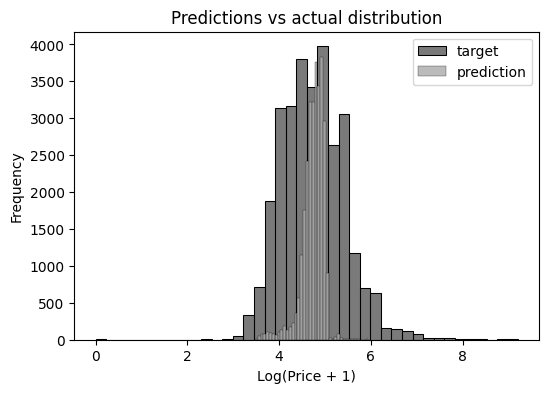

In [1314]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label="target", color="#222222", alpha=0.6, bins=40)
sns.histplot(y_pred, label="prediction", color="#aaaaaa", alpha=0.8, bins=40)

plt.legend()

plt.ylabel("Frequency")
plt.xlabel("Log(Price + 1)")
plt.title("Predictions vs actual distribution")

plt.show()

In [1315]:
max(y_train) - min(y_train), max(y_pred) - min(y_pred)

(np.float64(9.210440366976517), np.float64(2.476066775413358))

The bins in the histogram have different widths despite specifying the same number of bins because sns.histplot automatically adjusts bin widths depending on the range of values in the data. The cell above shows the ranges for each.

The center of the prediction seems to line up with the target, so even if the range is not the same, the model doesn't seem so bad.

## Step 5: Evaluation

Let's evaluate the model to see if it solves the original business problem and measure its success at doing that.

Looking at plots and comparing the distributions of the actual target variable with the predictions is a good way to evaluate quality, but we cannot do this every time we change something in the model. Instead, we need to use a metric that quantifies the quality of the model. We can use many metrics to evaluate how well a regression model behaves. The most commonly used one is root mean squared error, or RMSE for short.

RMSE tells us how large the errors are that our model makes.

When using NumPy to implement RMSE, we can take advantage of vectorization: the process of applying the same operation to all elements of one or more NumPy arrays. The code is more concise, and vectorized operations are a lot faster than simply Python for loops.

In [1316]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [1317]:
rmse(y_train, y_pred)

np.float64(0.6535588751957725)

The code prints 0.65 for the RMSE, this number tells us that on average, the model's predictions are off by 0.65. This result alone may not be very useful, but we can use it to compare this model with other models. If one model has a better RMSE than the other, it indicates that the model is better.

The model will be used to predict the price of rentals that it didn't see before. For that purpose, we set aside a validation dataset. We intentionally don't use it for training and keep it for validating the model.

We have already split our data into multiple parts: df_train, df_validation, and df_test. We have also created a matrix X_train from df_train and used X_train and y_train to train the model. Now we need to do the same steps to get X_validation -- a matrix with features computed from the validation dataset. Then we can apply the model to X_validation to get predictitons and compare them with y_validation.

In [1318]:
X_validation = prepare_X(df_validation)
y_pred = w_0 + X_validation.dot(w)

         host_id  latitude  longitude  minimum_nights  reviews_per_month
41972   72234136  40.77655  -73.93587               1               2.89
14596     576387  40.72190  -73.99669               5               0.12
18427    1206310  40.69369  -73.92421              10               0.09
8783     1012583  40.71458  -73.96181               7               0.13
47629  106823925  40.68886  -73.98303               2               0.00
...          ...       ...        ...             ...                ...
39514  222779801  40.72963  -73.98662               1               2.49
13236   34010790  40.68808  -73.92060               1               0.00
2657     2594389  40.74206  -73.99499               3               0.00
16024   23050317  40.70944  -73.94920               7               0.16
1354     2934010  40.73413  -74.00465               1               0.06

[9779 rows x 5 columns]
[[ 7.2234136e+07  4.0776550e+01 -7.3935870e+01  1.0000000e+00
   2.8900000e+00]
 [ 5.7638700e+05  4

The y_pred array below contains the predictions for the validation dataset. Now we use y_pred and compare it with the actual prices from y_validation, using the RMSE function.

In [1319]:
rmse(y_validation, y_pred)

np.float64(0.6553174764826868)

The value this code prints is 0.66, which is the number we should use for comparing models.

We already have a simple baseline model with simple features. To improve our model further, we can add more features to the model: we create others and add them to the existing features. This process is called feature engineering.

Since we have already set up the validation framework, we can easily verify whether adding new features improves the quality of the model. Our aim is to improve the RMSE calculated on the validation data.

We can create a new feature, "last_review_age", from the feature "last_review". The age of the most recent review should be helpful when predicting its price: intuitively, the more recent the review, the more likely that it's popular, and can charge a higher price.

In [1320]:
df_train["last_review_age"] = max(pd.to_datetime(df_train.last_review).dt.year) - pd.to_datetime(df_train.last_review).dt.year.fillna(0)

In [1321]:
df_train["last_review_age"]

22043       0.0
39679       1.0
45220       0.0
26853       0.0
7366     2019.0
          ...  
4729        1.0
4917        0.0
19491    2019.0
11670       1.0
26546       0.0
Name: last_review_age, Length: 29337, dtype: float64

We already know that we will need to apply the same preprocessing twice: to the training and validation sets. Because we don’t want to repeat the feature extraction code multiple times, let’s put this logic into the prepare_X function.

In [1322]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
 
    df["last_review_age"] = max(pd.to_datetime(df.last_review).dt.year) - pd.to_datetime(df.last_review).dt.year
    features.append("last_review_age")
 
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

The behavior shown above is known as a side effect: the caller of the function may not expect the function to change the DataFrame. To prevent the unpleasant surprise, we modify the copy of the original DataFrame. We don't want to modify the original DataFrame.

In [1323]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print("train", rmse(y_train, y_pred))

X_validation = prepare_X(df_validation)
y_pred = w_0 + X_validation.dot(w)
print("validation", rmse(y_validation, y_pred))

train 0.6527148266810424
validation 0.6543554446698281


The errors for both train and validation went down a bit, so this concludes that adding "last_review_age" is helpful when making predictions.

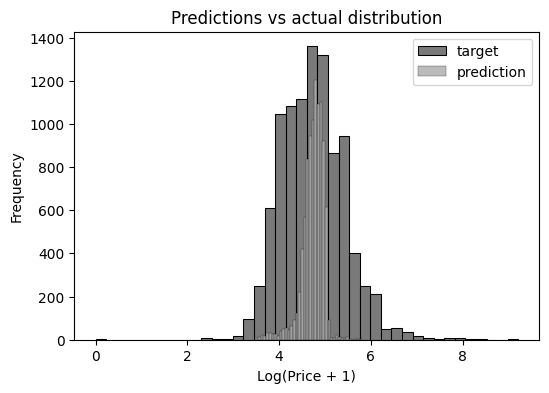

In [1324]:
plt.figure(figsize=(6, 4))


sns.histplot(y_validation, label="target", color="#222222", alpha=0.6, bins=40)
sns.histplot(y_pred, label="prediction", color="#aaaaaa", alpha=0.8, bins=40)

plt.legend()

plt.ylabel("Frequency")
plt.xlabel("Log(Price + 1)")
plt.title("Predictions vs actual distribution")

plt.show()

In the figure above, we see that the distribution of the predictions more closely follows the target distribution than before. The validation RMSE score confirms it.

Categorical variables describe characteristics of objects and can take one of a few possible values. Categorical variables are not always strings and can sometimes be numbers, such as when you consider the doors of a car, this can only be one of a few possible values.

We can use categorical variables in a machine learning model in multiple ways. One of the simplest ways is to encode such variables by a set of binary features, with a separate feature for each distinct value.

In our case, we will create 5 binary features: in_manhattan, in_brooklyn, in_queens, in_bronx, and in_staten_island. If the rental is in manhattan, in_manhatan will be set to 1, and the rest will be 0. The same for the other features.

This method of encoding categorical variables is called one-hot encoding. We will do the simplest way to do this encoding: looping over the possible values and, for each value, checking whether the value of the observation matches it.

Let's add these lines to the prepare_X function for variables based on neighbourhood_group and room_type:

In [1325]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
 
    # df["last_review_age"] = max(pd.to_datetime(df.last_review).dt.year) - pd.to_datetime(df.last_review).dt.year  # look at the comment a few lines below
    df["last_review_age"] = 2019 - pd.to_datetime(df.last_review).dt.year
    features.append("last_review_age")

    # for variable in df["neighbourhood_group"].value_counts().index.tolist():  # this syntax will not work because let's say you are given a new dataset and want to predict a price, it'll only have 1 value in neighbourhood_group, so not all of the variables will be added to the features
    for variable in ["manhattan", "brooklyn", "queens", "bronx", 'staten_island']:
        feature = "in_%s" % variable
        df[feature] = (df["neighbourhood_group"] == variable).astype(int)
        features.append(feature)

    # for variable in df["room_type"].value_counts().index.tolist():
    for variable in ["entire_home/apt", "private_room", "shared_room"]:
        feature = "is_%s" % variable
        df[feature] = (df["room_type"] == variable).astype(int)
        features.append(feature)
 
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Now, let's check whether this code improves the RMSE of the model:

In [1326]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_validation = prepare_X(df_validation)
y_pred = w_0 + X_validation.dot(w)
print("validation:", rmse(y_validation, y_pred))

validation: 1051.6487135577224


We see that the validation is now ~1052, so the model got much worse. We see that adding new features does not always help, and in this case it made the model much worse. The reason for this behaviour is numerical instability. For example, if we already have the latitude and longitude in our features and we decide to add the neighborhood, it's kind of like adding a feature that is very similar to ones already in the dataset, but multiplied by a constant.

When this happens, XTX becomes undetermined or singular, which means that it's not possible to find an inverse for this matrix. If we try to invert a singular matrix, NumPy will tell us about that by raising a LinAlgError.

In numerical linear algebra, such issues are called numerical instability issues, and they are typically solved with regularization techniques. The aim of regularization is to make sure that the inverse exists by forcing the matrix to be invertible. It's kind of controlling the weights of the model so that they behave correctly and don't grow too large, as in our case.

One way to do regularization is to add a small number to each diagonal element of the matrix. We do that and update the train_linear_regression function by adding regularization and using a new train_linear_regression_reg function.

In [1327]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

The r parameter in the function above controls the amount of refularization.

Regularization affects the final solution by making the components of w smaller. We can see that the more regularization we add, the smaller the weights become.

In [1328]:
X_train = prepare_X(df_train)

for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[2], w[4]))

    0, 438225670721320.75, 11259.89, -14.22
0.001, -95.21, -2.59, -0.02
 0.01, -36.73, -1.66, -0.02
  0.1, -5.14, -1.16, -0.02
    1, -0.54, -1.06, -0.02
   10, -0.05, -0.86, -0.02


We start with 0, which is an unregularized solution, and get very large numbers. Then we try 0.001 and increase it 10 times on each step: 0.01, 0.1, 1, and 10. We see that the values that we selected become smaller as r grows.

In [1329]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
 
X_validation = prepare_X(df_validation)
y_pred = w_0 + X_validation.dot(w)
print("validation:", rmse(y_validation, y_pred))

validation: 0.4988573767263985


This result is a great improvement from 1052.

Sometimes, when adding a new feature causes performance degradation, simply removing this feature may be enough to solve the problem. Having a validation dataset is important to decide whether to add regularization, remove the feature, or do both: we use the score on the validation data to choose the best option. In our particular case, we see that adding regularization helps: it improves the score we had previously.

In [1330]:
X_train = prepare_X(df_train)
X_validation = prepare_X(df_validation)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_validation.dot(w)
    print("%6s" %r, rmse(y_validation, y_pred))

 1e-06 0.49891326637826794
0.0001 0.49889681688202486
 0.001 0.4988573767263985
  0.01 0.499805424611677
   0.1 0.5009960829284275
     1 0.5011788997322225
     5 0.5011476071653578
    10 0.5012112691469358


We see that the best performance is achieved with a smaller r.

We also notice that the performance for values below 0.1 don’t change much except in the sixth digit, which we shouldn’t consider to be significant.

Let’s take the model with r=0.01 as the final model. Now we can check it against the test dataset to verify if the model works:

In [1331]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
 
X_validation = prepare_X(df_validation)
y_pred = w_0 + X_validation.dot(w)
print("validation:", rmse(y_validation, y_pred))
 
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print("test:", rmse(y_test, y_pred))

validation: 0.499805424611677
test: 0.5021474381695892


Since these two numbers are pretty close, we conclude that the model can generalize well to the new unseen data.

## Step 6: Deployment

We deploy the model to the production environment.

### Using the model

Since we now have a model, we can start using it for predicting the price of a rental in NYC. Suppose that a new rental popped up with the following info:

In [1332]:
ad = {
    "id": 3728,
    "name": "brand_new_rental_up_the_block",
    "host_id": 368,
    "host_name": "peter",
    "neighbourhood_group": "brooklyn",
    "neighbourhood": "clinton_hill",
    "latitude": 40.68553,
    "longitude": -73.95473,
    "room_type": "private_room",
    "price": 75,
    "minimum_nights": 3,
    "number_of_reviews": 45,
    "last_review": "2018-11-19",
    "reviews_per_month": 0.35,
    "calculated_host_listings_count": 3,
    "availability_365": 345
}

We'd like to suggest the price for this rental. For that, we use our model:

In [1333]:
df_test_ad = pd.DataFrame([ad])
X_test = prepare_X(df_test_ad)
y_pred = w_0 + X_test.dot(w)

This prediction is not the final price, however; it's the logarithm of the price. To get the actual price, we need to undo the logarithm and apply the exponent function:

In [1334]:
suggestion = np.expm1(y_pred)
suggestion

array([66.99668915])

The output is 67. The real price of this car is $75, so our model is not far from the actual price.

Let's try with some random rentals from the original dataset.

In [1335]:
import random
for i in range(10):
    random_i = int(random.random() * n_test)
    ad = df_test.iloc[random_i].to_dict()
    X_test = prepare_X(pd.DataFrame([ad]))[0]
    y_pred = w_0 + X_test.dot(w)
    suggestion = np.expm1(y_pred)
    print(ad["price"], suggestion)

125 146.75669149280893
250 223.3717298707531
130 71.0760356159288
50 43.17315818233426
59 88.83410538947764
115 209.9219651675119
100 129.48660790979898
2000 212.59335073928372
225 200.00465862603951
80 136.66735049783915


The cell above shows that rentals with higher prices are generally predicted to have higher price, the same goes for rentals with lower prices. The current model looks good!